# Author : Anisha Mishra

# Task-2: Prediction using Supervised Machine Learning
    
    In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [6]:
# Importing all the required libraries for this prediction model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# Reading and importing the data from the remote link
link="http://bit.ly/w-data"
data_f=pd.read_csv(link)
print("Data imported successfully")
data_f.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


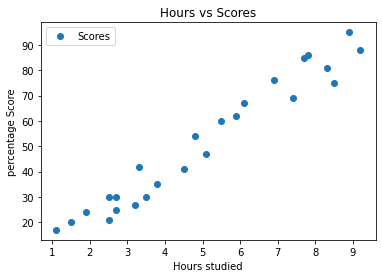

In [129]:
#Plotting the data

data_f.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('percentage Score')
plt.show()

OBSERVATION: We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.

In [45]:
#preparing the data

x=data_f['Hours'].values.reshape(-1,1)
y=data_f['Scores'].values

print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data into for training and testing

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, 
                            test_size=0.2, random_state=42) 
print(x_train,x_test,y_train,y_test)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]] [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]] [25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88] [81 30 21 76 62]


# Training the Linear Regression Model


In [122]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print('training done')


training done


# Plotting the Regression line

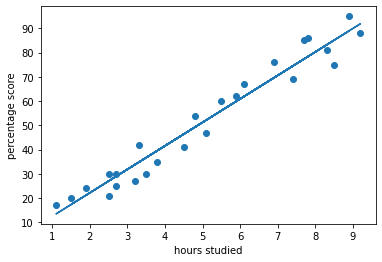

In [123]:
#since y=mx+c[equation of a line]
coeff=reg.coef_
intercept=reg.intercept_

line = (coeff*x) + intercept
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel('hours studied')
plt.ylabel('percentage score')
plt.show()

# Making predictions

In [131]:
y_pred=reg.predict(x_test)
print(x_test)
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


# Comparing the actual scores Vs predicted scores

In [125]:
compare=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# What will be predicted score if a student studies for 9.25 hrs/ day? 

In [126]:
hours = np.asarray(9.25).reshape(-1,1)
prediction_score=reg.predict(hours)
print("No of Hours={}".format(hours[0]))
print("Percentage score = {}".format(prediction_score[0]))


No of Hours=[9.25]
Percentage score = 92.38611528261494


# Evaluating the model

In [127]:
from sklearn import metrics

In [128]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994
